<a href="https://colab.research.google.com/github/roboy88/Predictive-AI-for-Supply-Chain-Resilience/blob/main/Predictive_AI_for_Supply_Chain_Resilience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving DataCoSupplyChainDataset.csv to DataCoSupplyChainDataset (1).csv
Saving DescriptionDataCoSupplyChain.csv to DescriptionDataCoSupplyChain (1).csv
Saving tokenized_access_logs.csv to tokenized_access_logs (1).csv
Supply Chain Dataset:


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


Description Metadata:


,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased...
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer


Access Logs Sample:


,Product,Category,Date,Month,Hour,Department,ip,url
0,adidas Brazuca 2017 Official Match Ball,baseball & softball,9/1/2017 6:00,Sep,6,fitness,37.97.182.65,/department/fitness/category/baseball%20&%20so...
1,The North Face Women's Recon Backpack,hunting & shooting,9/1/2017 6:00,Sep,6,fan shop,206.56.112.1,/department/fan%20shop/category/hunting%20&%20...
2,adidas Kids' RG III Mid Football Cleat,featured shops,9/1/2017 6:00,Sep,6,apparel,215.143.180.0,/department/apparel/category/featured%20shops/...
3,Under Armour Men's Compression EV SL Slide,electronics,9/1/2017 6:00,Sep,6,footwear,206.56.112.1,/department/footwear/category/electronics/prod...
4,Pelican Sunstream 100 Kayak,water sports,9/1/2017 6:01,Sep,6,fan shop,136.108.56.242,/department/fan%20shop/category/water%20sports...


Supply Chain Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Custom

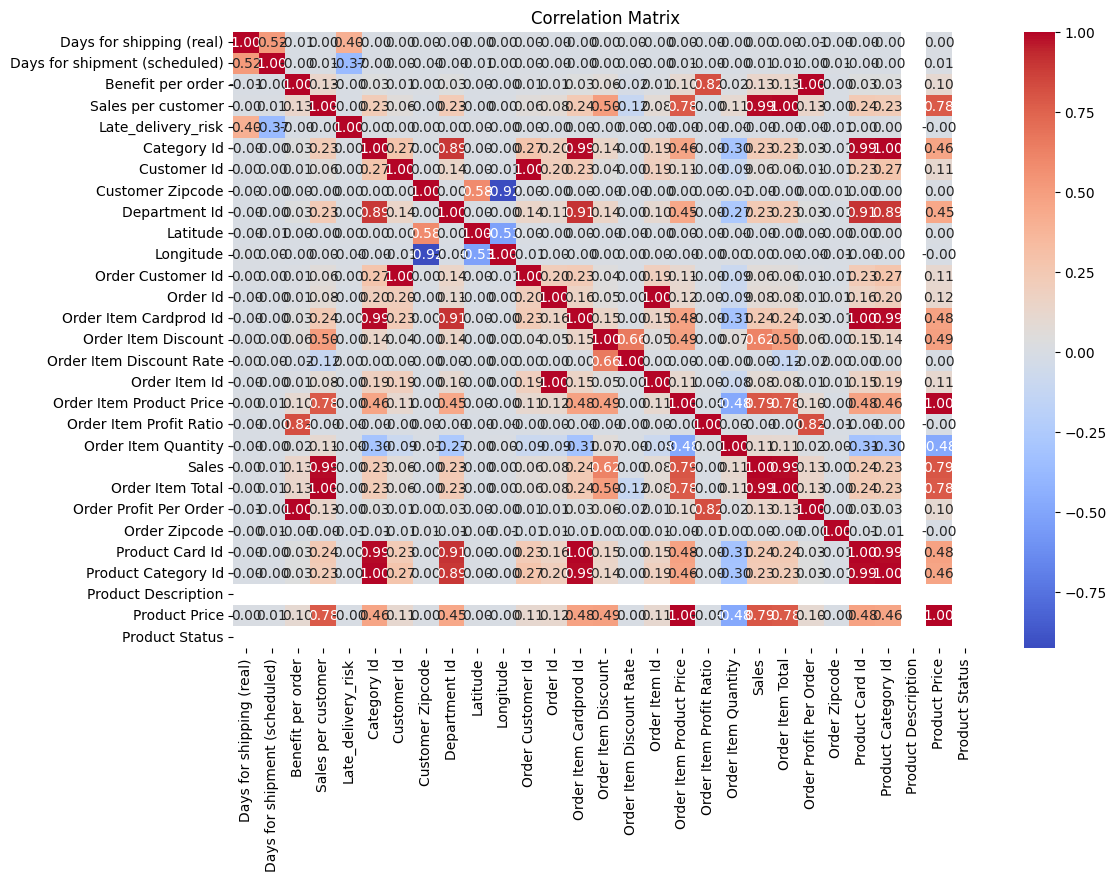


=== MODEL REPORT ===
[[11699  3700]
 [ 7831 12874]]
              precision    recall  f1-score   support

       False       0.60      0.76      0.67     15399
        True       0.78      0.62      0.69     20705

    accuracy                           0.68     36104
   macro avg       0.69      0.69      0.68     36104
weighted avg       0.70      0.68      0.68     36104

Accuracy: 0.68


In [2]:
# Smart Supply Chain Analytics with AI
# Author: Roman Dobczansky | GitHub: https://github.com/roboy88

# === SETUP: LIBRARIES ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# === STEP 1: FILE UPLOAD (Colab Manual) ===
from google.colab import files
uploaded = files.upload()

# === STEP 2: LOAD DATASETS ===
supply_chain_df = pd.read_csv("DataCoSupplyChainDataset.csv", encoding='ISO-8859-1')
description_df = pd.read_csv("DescriptionDataCoSupplyChain.csv", encoding='ISO-8859-1')
access_logs_df = pd.read_csv("tokenized_access_logs.csv", encoding='ISO-8859-1')

# === STEP 3: DATA SNAPSHOT ===
print("Supply Chain Dataset:")
display(supply_chain_df.head())

print("Description Metadata:")
display(description_df.head())

print("Access Logs Sample:")
display(access_logs_df.head())

# === STEP 4: EDA STARTER ===
print("Supply Chain Data Info:")
supply_chain_df.info()

print("\nMissing Values:")
print(supply_chain_df.isnull().sum().sort_values(ascending=False).head(10))

# Correlation heatmap of numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(supply_chain_df.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# === STEP 5: FEATURE SELECTION AND LABEL CREATION ===
# Fix column names for clarity
supply_chain_df.columns = supply_chain_df.columns.str.strip()

# Create LateDelivery label
supply_chain_df['LateDelivery'] = supply_chain_df['Days for shipping (real)'] > supply_chain_df['Days for shipment (scheduled)']

# Select modeling features
features = ['LateDelivery', 'Product Category Id', 'Order Status', 'Shipping Mode', 'Order Region', 'Customer Segment']
model_df = supply_chain_df[features].dropna()

# One-hot encode categorical features
model_df_encoded = pd.get_dummies(model_df, drop_first=True)

# === STEP 6: MODEL TRAINING ===
X = model_df_encoded.drop('LateDelivery', axis=1)
y = model_df_encoded['LateDelivery']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# === STEP 7: MODEL EVALUATION ===
print("\n=== MODEL REPORT ===")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# === STEP 8: NEXT STEPS ===
# - Forecast demand using regression
# - Visualize shipping behavior by region/product
# - Use access_logs_df for behavioral clustering or anomaly detection
# - Build Tableau or Plotly dashboard

# === NOTE ===
# To run this notebook:
# 1. Open in Google Colab
# 2. Click the "folder" icon (left side)
# 3. Upload the following files:
#    - DataCoSupplyChainDataset.csv
#    - DescriptionDataCoSupplyChain.csv
#    - tokenized_access_logs.csv


In [3]:
# === STEP 5: FEATURE SELECTION AND LABEL CREATION ===
supply_chain_df.columns = supply_chain_df.columns.str.strip()

# Create target label
supply_chain_df['LateDelivery'] = supply_chain_df['Days for shipping (real)'] > supply_chain_df['Days for shipment (scheduled)']

# Selected strong predictors (refined set)
features = [
    'LateDelivery',
    'Sales',
    'Order Item Quantity',
    'Order Item Discount',
    'Order Profit Per Order',
    'Shipping Mode',
    'Customer Segment',
    'Order Region',
    'Order Status'
]

model_df = supply_chain_df[features].dropna()
model_df_encoded = pd.get_dummies(model_df, drop_first=True)

# === STEP 6: MODEL TUNING + TRAINING ===
X = model_df_encoded.drop('LateDelivery', axis=1)
y = model_df_encoded['LateDelivery']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Hyperparameter-tuned Random Forest
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# === STEP 7: EVALUATION ===
print("\n=== TUNED MODEL REPORT ===")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Tuned Accuracy: {accuracy_score(y_test, y_pred):.4f}")



=== TUNED MODEL REPORT ===
[[12954  2470]
 [ 8592 12088]]
              precision    recall  f1-score   support

       False       0.60      0.84      0.70     15424
        True       0.83      0.58      0.69     20680

    accuracy                           0.69     36104
   macro avg       0.72      0.71      0.69     36104
weighted avg       0.73      0.69      0.69     36104

Tuned Accuracy: 0.6936
